<a href="https://colab.research.google.com/github/mraskj/css_fall2023/blob/main/code/class12/class12-tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 12: Image Basics - Tutorial



## Setup


Cloning GitHub Repository

In [ ]:
# Clone GitHub directory into
!git clone https://github.com/mraskj/css_fall2023.git

Cloning into 'css_fall2023'...
remote: Enumerating objects: 933, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 933 (delta 131), reused 166 (delta 83), pack-reused 691
Receiving objects: 100% (933/933), 572.64 MiB | 13.01 MiB/s, done.
Resolving deltas: 100% (454/454), done.
Updating files: 100% (137/137), done.


Importing Modules

In [ ]:
# Wget is a free software to download files from widely used Internet protocols
# such as HTTP, HTTPS, FTP, etc.
!wget https://raw.githubusercontent.com/cmusatyalab/openface/master/openface/align_dlib.py

--2023-11-15 10:17:36--  https://raw.githubusercontent.com/cmusatyalab/openface/master/openface/align_dlib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7866 (7.7K) [text/plain]
Saving to: ‘align_dlib.py’

align_dlib.py       100%[===================>]   7.68K  --.-KB/s    in 0s      

2023-11-15 10:17:36 (110 MB/s) - ‘align_dlib.py’ saved [7866/7866]



In [ ]:
# For file and directory management
import os

# For web-scraping
import requests

# For data handling
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt

import cv2
import dlib

import skimage.draw
from skimage.io import imshow, imread
from skimage.transform import downscale_local_mean

from pathlib import Path
from google.colab.patches import cv2_imshow

from align_dlib import AlignDlib

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

In [ ]:
# Define path to data used in the tutorial
img_fdir = '/content/css_fall2023/data/image/class12/'

## Image Resolution

All credit to:
- https://medium.com/swlh/image-processing-with-python-digital-image-sampling-and-quantization-4d2c514e0f00
- https://github.com/j-manansala/sampling-quantization/tree/main

### Sampling Frequency

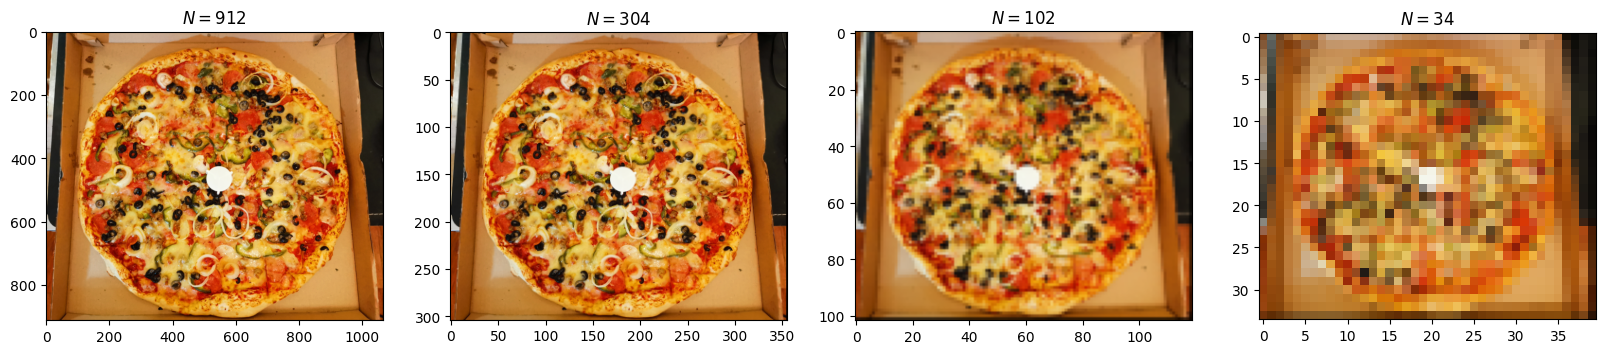

In [ ]:
pizza = imread(os.path.join(img_fdir, 'sampling', 'pizza.jpg'))

factors = 3**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for factor, ax in zip(factors, axis):
    image = downscale_local_mean(pizza,
                                 factors=(factor, factor, 1)).astype(int)
    ax.imshow(image)
    ax.set_title('$N={}$'.format(image.shape[0]))

In the first two images, we can observe that there is not much of a difference. This signifies that unless we need to zoom in on the image, we do not require a higher resolution on the image to understand the image’s details better.

However, as we further decrease the sampling on the image’s spatial resolution, it is clear that the image is no longer clear. Lots of information is lost, and the digital image cannot fully represent the analog object.

### Image Quantization

The next concept that we need to understand is image quantization. Image quantization involves discretizing the intensity values of the analog image.

To demonstrate this, let us try to discretize an analog image of a circle where k is the number of bits representing an intensity value.

In [ ]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2

factors = 2**np.arange(1, 5)
circ_image = circle_image(np.linspace(0, 1, num=4),
                          np.linspace(0, 1, num=4))

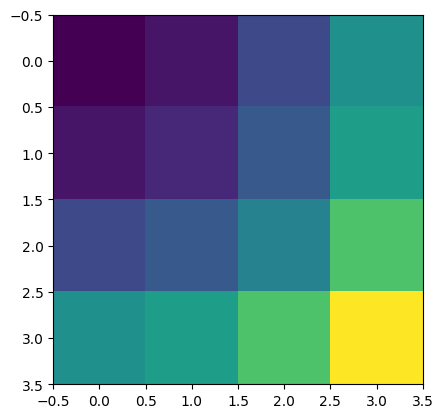

In [ ]:
plt.imshow(circ_image)

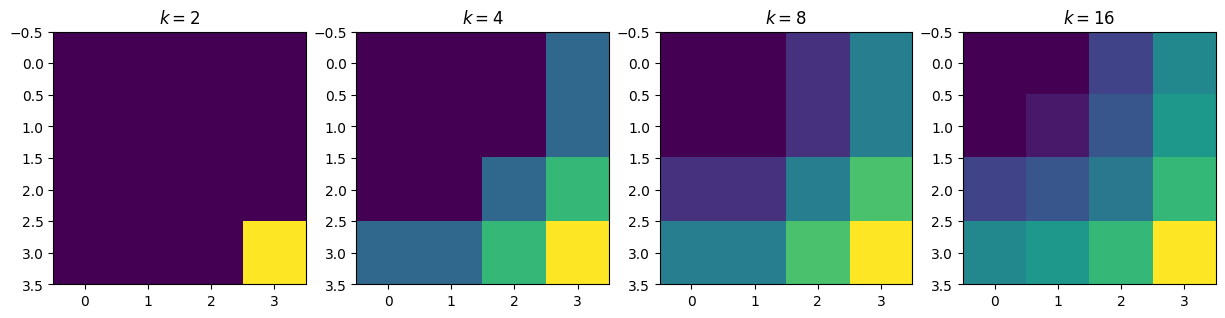

In [ ]:
fig, ax = plt.subplots(1, len(factors), figsize=(15, 4))
for i, k in enumerate(factors):
    bins = np.linspace(0, circ_image.max(), k)
    image = np.digitize(circ_image, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1)
    ax[i].imshow(image)
    ax[i].set_title('$k = {}$'.format(k))

We'll now do it for the pizza picture:

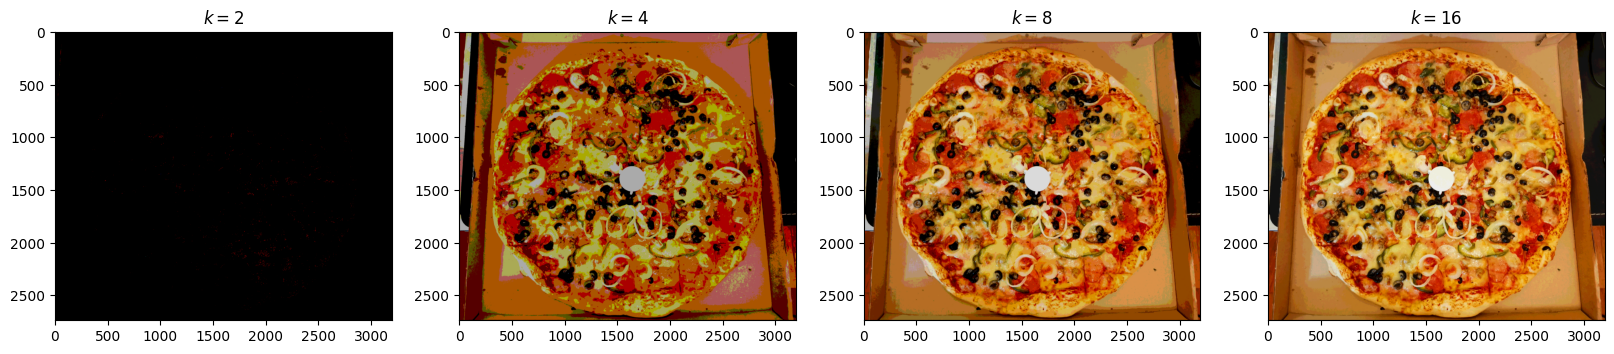

In [ ]:
factors = 2**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for k, ax in zip(factors, axis):
    bins = np.linspace(0, pizza.max(), k)
    image = np.digitize(pizza, bins)
    image = (np.vectorize(bins.tolist().__getitem__)
                         (image-1).astype(int))
    ax.imshow(image)
    ax.set_title('$k = {}$'.format(k))

On the lower spectrum, we can see that as we further decrease the image’s discretization, the image quality degradation becomes more apparent. This comes to the point where the digital image can no longer represent the analog object’s varying shades of color due to the limited intensity value range.

On the higher spectrum, we can observe that there is not much of a difference. This signifies that there is a limit on how much discrete intensity values the human eye can perceive. If we further increase the number of discrete intensity values, there will be little to no difference in the image’s quality.

## Pixels and Colors

In [ ]:
# Define function to plot image that turns off grid and axis
def plot_image(img):
    plt.figure()
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
    plt.show()
    return

We start by exploring how Python represents images using the PIL package's `Image()` function to read in an image from wikipedia.

In [ ]:
url = "https://cdn.nba.com/manage/2023/04/lebron-driving.jpg"
img = Image.open(requests.get(url, stream=True).raw)
img_array = np.array(img)

print(f"Image height and width: {img.size}")
print(f"Max intensity: {np.max(img_array)}")
print(f"Min intensity: {np.min(img_array)}")

Image height and width: (1920, 1080)
Max intensity: 255
Min intensity: 0


Next, we manually inspect the content of the array, its type, and how it looks when we plot it

In [ ]:
img_array

In [ ]:
# Check that image is an array
type(img_array)

numpy.ndarray

In [ ]:
img_array.shape

(1080, 1920, 3)

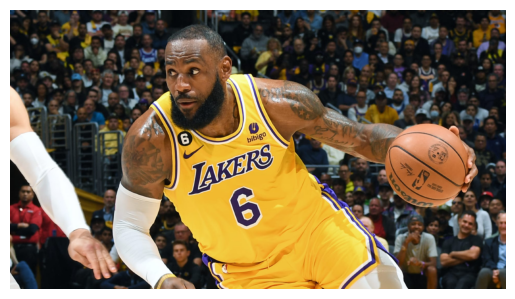

In [ ]:
# Plot image
plot_image(img=img_array)

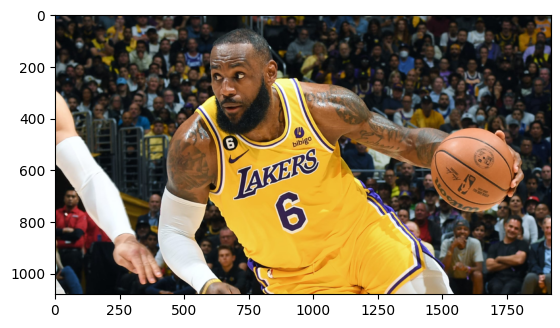

In [ ]:
plt.figure()
plt.imshow(img_array)

Thats is an image LeBron James in action for LA Lakers. Notice that the image is simply printed as a sort of scatter plot, with pixel values at every combination of height, width, and channel. There is, so to say, no spot with no information. In order to fully show this point try to print the shape and data type of the image and the values in it.



In [ ]:
# Shape of image
print(img_array.shape)

In [ ]:
# Type of data
print(img_array.dtype)

uint8


We see that this is a 3D array of intergers with 3 color channels (RGB). This is what we expected, as images are tensors (3D arrays) with red, green and blue color values.

Now, to get a feel for how to work with images, let us try some basic operations. Lets subset the image to only Lebron's face using standard numpy indexing and then print it.




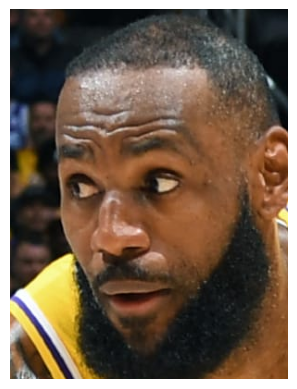

In [ ]:
# Subset to face
face = img_array[50:450,550:850,:]

# Plot
plot_image(face)

To see the role of the color channel, we try to remove the entire green color. This can also be done with standard indexing. What color do we expect?

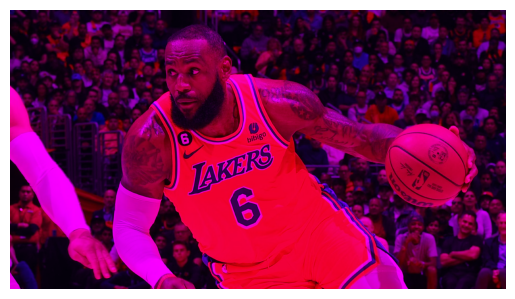

In [ ]:
# Make a copy and force the green color channel to be 0
no_green_img = img_array.copy()
no_green_img[:,:,1] = 0

# Plot the green-less image
plot_image(no_green_img)

To make things totally clear, an image is just a matrix! We now define an image with pure uniform noise:

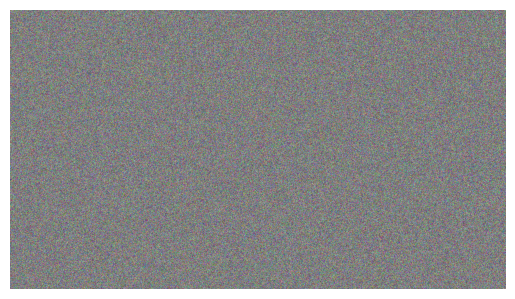

In [ ]:
np.random.seed(10)
random_img = np.random.randint(low=0, high=255, size=img_array.shape, dtype=np.uint8)
# mean = 0
# std_dev = 1
# gaussian_noise = np.random.normal(mean, std_dev, size=img_array.shape)
plot_image(random_img)

We can impose noise on the original picture. We try do it on the red channel:

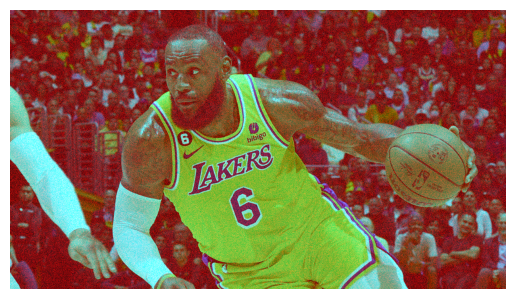

In [ ]:
# Impose noise in the red channel
img_array[:,:,0] = random_img[:,:,0]

# Plot the noise-inflated image
plot_image(img_array)

## Preprocessing Steps

### Contrasting: Normalization

We often normalize pixel values either by scaling or centering. The most simple way is simply to normalize values to a $[0, 1]$ range by dividing the pixels by the maximum value (e.g. $255$ if $8$-bit)

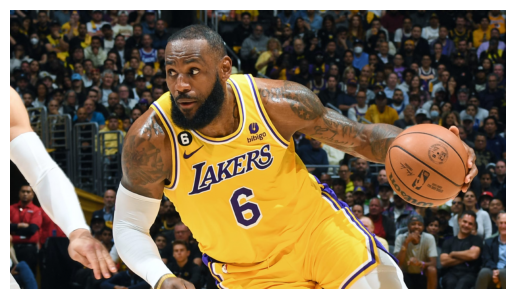

In [ ]:
# Normalize array by maximum value
img_array_normalized = np.array(img) / 255
plot_image(img_array_normalized)

### Resizing

#### Squashing

In [ ]:
# Create a hypothetical rectangular image (200x300 pixels)
original_img = np.random.randint(0, 255, size=(200, 300, 3), dtype=np.uint8)

# Define target size: (200x200) pixels
target_size = (200, 200)

In [ ]:
# Squash the image into a square
squashed_img = cv2.resize(original_img, target_size)

# Display the original and squashed images
plt.subplot(1, 2, 1), plt.imshow(original_img), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(squashed_img), plt.title('Squashed Image')
plt.show()

#### Padding

In [ ]:
# Add padding to make the image square
pad_color = [0, 0, 0]  # Black padding
padded_img = cv2.copyMakeBorder(original_img, 0, 100, 0, 0, cv2.BORDER_CONSTANT, value=pad_color)

# Display the original and padded images
plt.subplot(1, 2, 1), plt.imshow(original_img), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(padded_img), plt.title('Padded Image')
plt.show()

#### Squishing

In [ ]:
# Squish the image into a square
squished_img = cv2.resize(original_img, target_size)

# Display the original and squished images
plt.subplot(1, 2, 1), plt.imshow(original_img), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(squished_img), plt.title('Squished Image')
plt.show()

In [ ]:
# With Lebron:
squished_image = cv2.resize(img_array, (224, 224), interpolation=cv2.INTER_AREA)
plot_image(squished_image)

#### Cropping

In [ ]:
# Crop the image to make it square
h, w = original_img.shape[:2]
crop_start = (w - h) // 2
cropped_img = original_img[:, crop_start:crop_start + h, :]

# Display the original and cropped images
plt.subplot(1, 2, 1), plt.imshow(original_img), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cropped_img), plt.title('Cropped Image')
plt.show()

In [ ]:
def center_crop(img, dim):

  width, height = img.shape[1], img.shape[0]
  crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
  crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0]

  mid_x, mid_y = int(width/2), int(height/2)
  cw2, ch2 = int(crop_width/2), int(crop_height/2)
  crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
  return crop_img

# We LeBron:
plot_image(center_crop(img=img_array, dim=target_size))

## Face Detection and Processing

In [ ]:
# Download pretrained landmark predictor
# http://dlib.net/files/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2023-11-15 10:56:04--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  15.3MB/s    in 6.2s    

2023-11-15 10:56:10 (9.89 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
# Unzip the bz2 file into the content folder
!bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
# Define path to pretrained landmark model
landmark_path = '/content/shape_predictor_68_face_landmarks.dat'
align_dlib = AlignDlib(landmark_path)
detector  = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(landmark_path)

In [ ]:
def load_image(img, *args):
    img_color = cv2.imread(str(Path(img_fdir, *args, img)))
    img_plot  = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
    img_bw    = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
    return img_color, img_bw, img_plot

def save_image(img, fname, fdir):
    fpath = os.path.join(fdir, fname)
    cv2.imwrite(fpath, img)

crop_dim = 224
def crop_face(img):
    bounding_box = align_dlib.getLargestFaceBoundingBox(img)
    aligned = align_dlib.align(crop_dim, img, bounding_box, landmarkIndices=AlignDlib.INNER_EYES_AND_BOTTOM_LIP)
    return aligned

def remove_background(img):
  rect = detector(img)[0]
  sp = predictor(img, rect)
  landmarks = np.array([[p.x, p.y] for p in sp.parts()])

  outline = landmarks[[*range(17), *range(26,16,-1)]]

  Y, X = skimage.draw.polygon(outline[:,1], outline[:,0])

  cropped_img = np.zeros(img.shape, dtype=np.uint8)
  cropped_img[Y, X] = img[Y, X]
  return cropped_img

def variance_of_laplacian(img):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(img, cv2.CV_64F).var()

In [ ]:
# Search for images in directory
image_fname = [x for x in os.listdir(os.path.join(img_fdir, 'faces')) if '.jpg' in x]

# Construct filepath for element 1 (2nd element in the list)
image_fpath = os.path.join(img_fdir, 'faces', image_fname[-1])

# Print the filepath
image_fpath

'/content/css_fall2023/data/image/class12/faces/15675-Troels-Christian-Jakobsen-a.jpg'

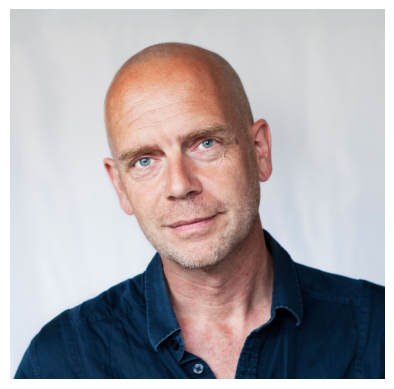

In [ ]:
# Load image filepath and plot it
img_color, img_bw, img_plot = load_image(image_fpath)
plot_image(img_plot)

In [ ]:
# Crop the face and plot it
aligned = crop_face(img=img_plot)
plot_image(aligned)
print(f"Laplacian: {variance_of_laplacian(aligned)}")

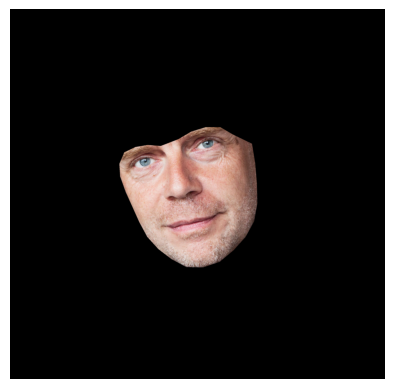

In [ ]:
# Remove background and plot
nobackground = remove_background(img=img_plot)
plot_image(nobackground)

In [ ]:
# save_image(img=img_bw, fname='bw-' + image_fname[0], fdir='/content')

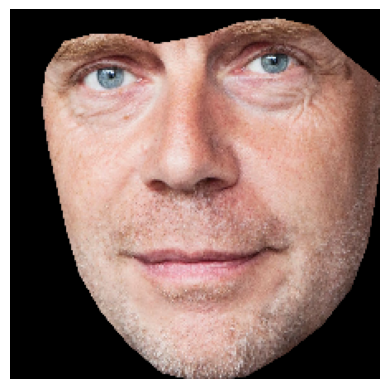

Laplacian: 1959.3505841209335


In [ ]:
# Crop the image with no background and plot
aligned = crop_face(img=nobackground)
plot_image(aligned)
print(f"Laplacian: {variance_of_laplacian(aligned)}")

## Facial Landmarks

https://gist.github.com/Shivanandmn/8a26186a6d0dbe3e49ae02afd48bd5ff

In [ ]:
rects = detector(img_color, 1)
predictor = dlib.shape_predictor(landmark_path)

def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
      coords[i] = (shape.part(i).x, shape.part(i).y)
    # return the list of (x, y)-coordinates
    return coords

NameError: ignored

In [ ]:
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(img_color, rect)
	shape = shape_to_np(shape)
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = rect_to_bb(rect)
	cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

  # show the face number
	cv2.putText(img_color, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(img_color, (x, y), 1, (0, 0, 255), -1)

In [ ]:
plot_image(img_color)

In [ ]:
cv2_imshow(img_color)

## Facial Expressions

There are a lot of open-source libraries in Python that allow you to use pretrained models to study facial expressions. We'll use PyFeat here, which is a fairly new and very easy library to use.

https://py-feat.org/pages/intro.html

In [ ]:
# Install PyFeat
!pip install py-feat --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.4/381.4 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 85.8 MB/s eta 0:00:00


In [ ]:
# Load image
img_color, img_bw, img_plot = load_image(image_fpath)

In [ ]:
from feat import Detector

# Define face detector
detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
)

100%|██████████| 176/176 [00:00<00:00, 188459.92it/s]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 126MB/s]


In [ ]:
plot_image(img_plot)

In [ ]:
pyfeat_df = pd.DataFrame()
for i in range(len(image_fname)):
  image_fpath = os.path.join(img_fdir, 'faces', image_fname[i])
  fex = detector.detect_image(image_fpath)
  fex['image'] = image_fname[i]
  pyfeat_df = pd.concat([pyfeat_df, fex], axis=0, ignore_index=True)

In [ ]:
pyfeat_df

In [ ]:
# Plot the face detector and the estimated facial expressions
figs = pyfeat_df.iloc[1:2].plot_detections(poses=True)

In [ ]:
# Plot face muscles
figs = pyfeat_df.iloc[1:2].plot_detections(faces='aus', muscles=True)

## Video-as-Data

All we have learned about images generalizes to videos, which is really just a lot of images concatenated together.

In [ ]:
from IPython.core.display import Video
video_fpath = os.path.join(img_fdir, 'video', '57-71-sample.mp4')
Video(video_fpath, embed=True)

In [ ]:
os.path.join(img_fdir, 'video', '57-71-sample.mp4')

In [ ]:
# Get frame rate (fps=frames per second)
!ffmpeg -i /content/css_fall2023/data/image/class12/video/57-71-sample.mp4

In [ ]:
# 20 seconds long, 25 fps: 500 frames. Process every 12th frame (500/12=41 or 42 frames)
video_prediction = detector.detect_video(video_fpath, skip_frames=12)

In [ ]:
video_prediction.frame.unique()

In [ ]:
video_prediction.loc[[372, 384]].plot_detections(faceboxes=False, add_titles=False)

## Head-Pose Movement

https://pypi.org/project/sixdrepnet/

https://github.com/thohemp/6DRepNet/tree/master

Python package to estimate head pose estimation based on images.

In [ ]:
!pip install sixdrepnet --quiet

In [ ]:
from sixdrepnet import SixDRepNet
model = SixDRepNet()

In [ ]:
cap = cv2.VideoCapture(video_fpath)
cap.set(cv2.CAP_PROP_POS_FRAMES,460-1)
# cap.get(cv2.CAP_PROP_FRAME_COUNT)

In [ ]:
ret, frame = cap.read()
pitch, yaw, roll = model.predict(frame)
_ = model.draw_axis(frame, yaw, pitch, roll)

In [ ]:
cv2_imshow(frame)